In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F

In [2]:
words = open("names.txt", "r").read().split()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(words)  

32033

In [4]:
min((len(word), word) for word in words)

(2, 'aj')

In [5]:
max((len(word), word) for word in words)

(15, 'muhammadmustafa')

In [6]:
counts = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for i, j in zip(chs, chs[1:]):
        bigram = (i,j)
        counts[bigram] = counts.get(bigram, 0) + 1

In [7]:
sorted(counts.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
counts_tensor = torch.zeros((27,27), dtype=torch.int32)
counts_tensor.shape

torch.Size([27, 27])

In [9]:
# charectors to integers mapping
ctoi = {c:i+1 for i, c in enumerate(sorted(set("".join(words))))}
ctoi['.'] = 0
ctoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [10]:
# integers to charectors mapping
itoc = {v : k for k,v in ctoi.items()}
itoc

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [11]:
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        counts_tensor[idx1, idx2] += 1


(-0.5, 26.5, 26.5, -0.5)

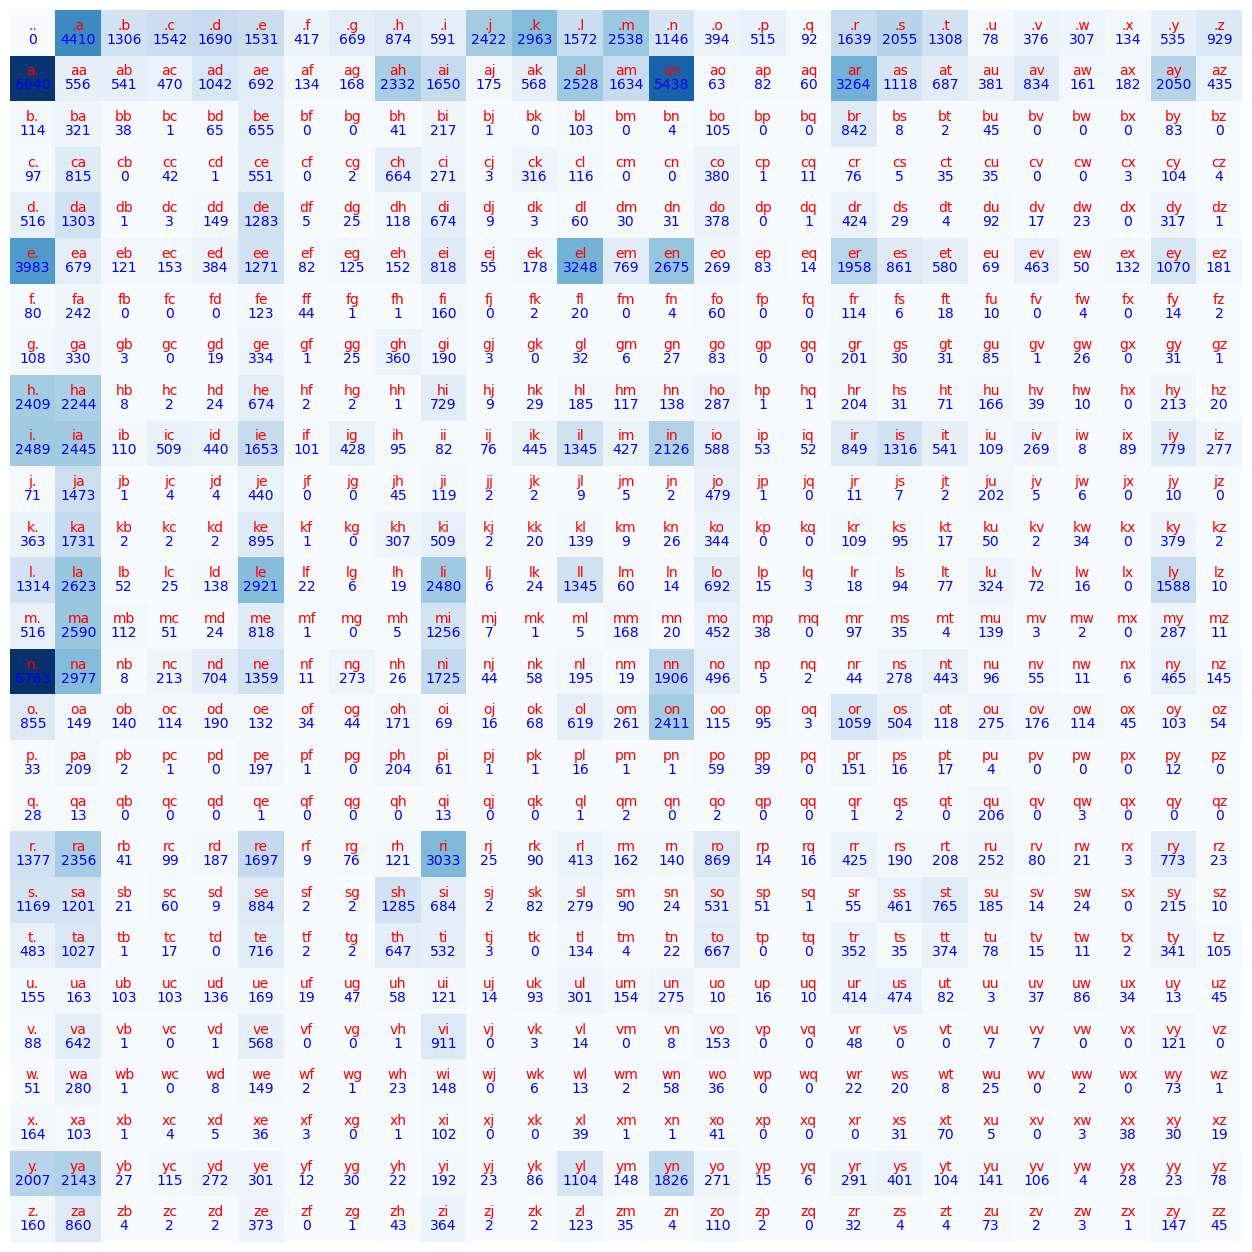

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(counts_tensor, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itoc[i] + itoc[j]
        plt.text(j, i, str(chstr), ha='center', va='bottom', color='red')
        plt.text(j, i, counts_tensor[i, j].item(), ha='center', va='top', color='blue')
plt.axis('off')

In [13]:
prob = counts_tensor[0].float()
prob = prob/prob.sum()
prob

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [15]:
prob.sum()

tensor(1.)

In [47]:
gen = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=gen).item()
itoc[idx]

'j'

In [48]:
normalised_counts_tensor = (counts_tensor+1).float()     # smoothing
normalised_counts_tensor /= normalised_counts_tensor.sum(1, keepdim= True) # The keepdim option is useful for maintaining consistent tensor shapes, especially in operations where further broadcasting or alignment with other tensors is required.

In [54]:
normalised_counts_tensor.shape

torch.Size([27, 27])

In [55]:
gen = torch.Generator().manual_seed(2147483647)

for i in range(10):
    index = 0 
    results = []
    while True:
        prob = normalised_counts_tensor[index]
        index = torch.multinomial(prob, num_samples=1, replacement=True, generator=gen).item()
        results.append(itoc[index])
        
        if index == 0:
            break
    
    print(f"{i}","".join(results))

0 junide.
1 janasah.
2 p.
3 cony.
4 a.
5 nn.
6 kohin.
7 tolian.
8 juee.
9 ksahnaauranilevias.


In [57]:
log_likelihood = 0.0
n = 0
for word in words[:2]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        prob = normalised_counts_tensor[idx1, idx2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob.item()
        n += 1
        print(f"{ch1}{ch2}: {prob:.10f} | {log_prob:.10f} | {log_likelihood :.10f}")
        
print(f'{log_likelihood = }')
NLL = -log_likelihood
ANLL = NLL / n

print(f'Negative Log Likelihood: {NLL:.10f}')
print(f'Average Negative Log Likelihood: {ANLL:.10f}')


.e: 0.0477854013 | -3.0410351753 | -3.0410351753
em: 0.0376528129 | -3.2793476582 | -6.3203828335
mm: 0.0253411308 | -3.6753265858 | -9.9957094193
ma: 0.3885140121 | -0.9454260468 | -10.9411354661
a.: 0.1958303899 | -1.6305063963 | -12.5716418624
.o: 0.0123206489 | -4.3964786530 | -16.9681205153
ol: 0.0778796598 | -2.5525903702 | -19.5207108855
li: 0.1774043590 | -1.7293236256 | -21.2500345111
iv: 0.0152301444 | -4.1844787598 | -25.4345132709
vi: 0.3507692218 | -1.0476267338 | -26.4821400046
ia: 0.1379738301 | -1.9806911945 | -28.4628311992
a.: 0.1958303899 | -1.6305063963 | -30.0933375955
log_likelihood = -30.0933375954628
Negative Log Likelihood: 30.0933375955
Average Negative Log Likelihood: 2.5077781330


In [220]:
log_likelihood = 0.0
n = 0
for word in ['priyanthan']:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        prob = normalised_counts_tensor[idx1, idx2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob.item()
        n += 1
        print(f"{ch1}{ch2}: {prob:.10f} | {log_prob:.10f}")
        
print(f'{log_likelihood = }')
NLL = -log_likelihood
ANLL = NLL / n

print(f'Negative Log Likelihood: {NLL:.10f}')
print(f'Average Negative Log Likelihood: {ANLL}')

.p: 0.0160948224 | -4.1292576790
pr: 0.1443494707 | -1.9355180264
ri: 0.2383908182 | -1.4338438511
iy: 0.0439981967 | -3.1236066818
ya: 0.2187085599 | -1.5200152397
an: 0.1603856981 | -1.8301737309
nt: 0.0241909120 | -3.7217781544
th: 0.1157763079 | -2.1560952663
ha: 0.2937328219 | -1.2250846624
an: 0.1603856981 | -1.8301737309
n.: 0.3685300350 | -0.9982330799
log_likelihood = -23.903780102729797
Negative Log Likelihood: 23.9037801027
Average Negative Log Likelihood: 2.1730709184299815


## Use single linear layer 

In [58]:
# training data
xs, ys = [], []

for word in words[:2]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        xs.append(idx1)
        ys.append(idx2)
        
XS = torch.tensor(xs)
YS = torch.tensor(ys)

. e
e m
m m
m a
a .
. o
o l
l i
i v
v i
i a
a .


In [60]:
XS

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1])

In [61]:
YS

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0])

In [62]:
enc_x = F.one_hot(XS, num_classes=27).float()
enc_x

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0

In [63]:
enc_x.dtype

torch.float32

In [64]:
W = torch.randn((27,1))   # single neuron
enc_x @ W # (12, 27) @ (27, 1) -> (12, 1)

tensor([[ 1.1940],
        [ 0.9486],
        [-0.0959],
        [-0.0959],
        [-1.2399],
        [ 1.1940],
        [ 0.4124],
        [-1.0790],
        [ 1.6898],
        [-0.5762],
        [ 1.6898],
        [-1.2399]])

In [65]:
W = torch.randn((27,27))  # 27 neurons
enc_x @ W            # (12, 27) @ (27, 27) -> (12, 27)

tensor([[-0.1106,  0.2176,  0.3954,  2.1932, -1.7431,  1.2619,  1.0851,  0.7485,
          0.9368, -1.4314,  0.6808, -1.8837, -0.7034, -1.3582,  0.1562,  0.8159,
          0.3333,  0.6613,  0.9540,  1.7267,  0.0545,  0.1013, -0.3300,  0.4174,
          0.6719,  0.3747,  0.0317],
        [-0.2225,  0.8719, -1.2172, -0.8201,  0.7009, -0.3061, -0.5962,  0.1350,
          0.2457, -0.3512,  0.6125,  1.2871, -1.3890,  0.2566,  0.6898,  0.0294,
          0.7228,  0.6428,  0.4514, -0.2989,  1.2132,  0.9437,  0.9535,  1.2157,
          0.5285,  1.3280, -1.6876],
        [ 0.5194,  0.1314, -1.9718, -0.4982,  0.0830, -1.4860, -0.2693, -1.2998,
         -0.1015,  0.2181, -0.7393, -2.4492, -0.1384,  0.1460,  1.1675,  0.1514,
         -0.6617, -0.2876,  1.1885, -0.3335,  0.1120, -0.4891,  0.0947,  0.5604,
          0.6775, -0.8593, -0.4279],
        [ 0.5194,  0.1314, -1.9718, -0.4982,  0.0830, -1.4860, -0.2693, -1.2998,
         -0.1015,  0.2181, -0.7393, -2.4492, -0.1384,  0.1460,  1.1675,  0.1514

In [76]:
logits = (enc_x @ W )              # log counts 
counts = (enc_x @ W ).exp()                  # the last two layers represents softmax function
prob = counts/counts.sum(1, keepdim=True) 
prob[0]

tensor([0.0176, 0.0244, 0.0292, 0.1762, 0.0034, 0.0694, 0.0582, 0.0416, 0.0502,
        0.0047, 0.0388, 0.0030, 0.0097, 0.0051, 0.0230, 0.0445, 0.0274, 0.0381,
        0.0510, 0.1105, 0.0208, 0.0218, 0.0141, 0.0298, 0.0385, 0.0286, 0.0203])

In [75]:
logits[0]

tensor([-0.1106,  0.2176,  0.3954,  2.1932, -1.7431,  1.2619,  1.0851,  0.7485,
         0.9368, -1.4314,  0.6808, -1.8837, -0.7034, -1.3582,  0.1562,  0.8159,
         0.3333,  0.6613,  0.9540,  1.7267,  0.0545,  0.1013, -0.3300,  0.4174,
         0.6719,  0.3747,  0.0317])

In [74]:
counts[0]

tensor([0.8953, 1.2431, 1.4850, 8.9639, 0.1750, 3.5320, 2.9596, 2.1139, 2.5518,
        0.2390, 1.9754, 0.1520, 0.4949, 0.2571, 1.1691, 2.2611, 1.3956, 1.9374,
        2.5961, 5.6220, 1.0560, 1.1066, 0.7190, 1.5179, 1.9579, 1.4546, 1.0322])

In [77]:
nlls = torch.zeros(12)
for i in range(12):
    x = XS[i].item()
    y = YS[i].item()
    
    p = prob[i, y]
    logprob = torch.log(p)
    neg_ll = -logprob
    nlls[i] = neg_ll
    

In [78]:
nlls

tensor([2.6673, 3.5326, 3.1835, 3.1981, 3.1938, 3.1133, 3.1626, 2.2452, 3.5541,
        4.2005, 4.7731, 3.1938])

In [79]:
loss = nlls.mean()
loss

tensor(3.3348)

In [85]:
loss = -prob[torch.arange(12), YS].log().mean()
loss

tensor(3.3348)

### Forward pass

In [86]:
gen = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=gen, requires_grad= True)

In [87]:
xs, ys = [], []

for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        xs.append(idx1)
        ys.append(idx2)
        
XS = torch.tensor(xs)
YS = torch.tensor(ys)
num = XS.nelement()   
num 

228146

In [93]:
enc_x = F.one_hot(XS, num_classes=27).float()
logits = (enc_x @ W )              
counts = (enc_x @ W ).exp()              
prob = counts/counts.sum(1, keepdim=True) 
loss = -prob[torch.arange(num), YS].log().mean()
loss

tensor(3.7590, grad_fn=<NegBackward0>)

### backward pass

In [94]:
W.grad = None  # can set to zero
loss.backward()

In [95]:
W.data += -10 * W.grad

In [97]:
# gradient descent
for i in range(10):
    enc_x = F.one_hot(XS, num_classes=27).float()
    logits = (enc_x @ W )              
    counts = logits.exp()              
    prob = counts/counts.sum(1, keepdim=True) 
    loss = -prob[torch.arange(num), YS].log().mean()
    print(loss.item())
    W.grad = None  # can set to zero
    loss.backward()
    W.data += -1 * W.grad

3.1521811485290527
3.1490676403045654
3.145979881286621
3.142918825149536
3.139882802963257
3.136871814727783
3.1338863372802734
3.130925416946411
3.127988815307617
3.1250758171081543


###  Regularization

In [101]:
(W**2).sum()/(27*27)

tensor(0.8236, grad_fn=<DivBackward0>)

In [102]:
(W**2).mean()

tensor(0.8236, grad_fn=<MeanBackward0>)

In [ ]:
# gradient descent
for i in range(100):
    enc_x = F.one_hot(XS, num_classes=27).float()
    logits = (enc_x @ W )              
    counts = logits.exp()              
    prob = counts/counts.sum(1, keepdim=True) 
    loss = -prob[torch.arange(num), YS].log().mean() + 0.01*(W**2).mean()   # L2 regularization
    print(loss.item())
    W.grad = None  # can set to zero
    loss.backward()
    W.data += -1 * W.grad

2.4835638999938965
2.483541488647461
2.4835197925567627
2.483499050140381
2.4834790229797363
2.483459711074829
2.483441114425659
2.4834234714508057
2.483405590057373
2.483389377593994
2.4833731651306152
2.4833576679229736
2.4833431243896484
2.4833285808563232
2.4833147525787354
2.4833014011383057
2.483288526535034
2.483276128768921
2.483264207839966
2.483252763748169
2.483241319656372
2.4832308292388916
2.483220338821411
2.483210325241089
2.483201026916504
2.483191967010498
2.483182430267334
2.4831740856170654
2.483165740966797
2.4831578731536865
2.483150005340576
2.483142375946045
2.483135223388672
2.483128309249878
2.483121395111084
2.4831149578094482
2.4831085205078125
2.483102321624756
2.483096122741699
2.483090877532959
2.4830851554870605
2.4830803871154785
2.4830751419067383
2.483069896697998
2.483064889907837
2.483060359954834
2.483055830001831
2.4830515384674072
2.4830470085144043
2.4830431938171387
2.483039140701294
2.4830355644226074
2.4830315113067627
2.483027935028076
2.483

## generate

In [139]:
gen = torch.Generator().manual_seed(2147483647)

for i in range(12):
    out = []
    ix = 0
    
    while True:
        
        prob = normalised_counts_tensor[ix]
        
        # enc_x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        # logits = (enc_x @ W )              
        # counts = logits.exp()              
        # prob = counts/counts.sum(1, keepdim=True)
        
        ix = torch.multinomial(prob, num_samples=1, replacement=True, generator=gen).item()
        out.append(itoc[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.


In [323]:
gen = torch.Generator().manual_seed(2147483647)

for i in range(12):
    out = []
    ix = 0
    
    while True:
        
        # prob = normalised_counts_tensor[ix]
        
        enc_x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = (enc_x @ W )              
        counts = logits.exp()              
        prob = counts/counts.sum(1, keepdim=True)
        
        ix = torch.multinomial(prob, num_samples=1, replacement=True, generator=gen).item()
        out.append(itoc[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
kohin.
tolia.
s.
tee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.


## mostly the both method performs the same way